In [60]:
import physics_models
import test_physics_models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

In [6]:
test_physics_models.test_beers_law()
test_physics_models.test_random_spectra()
test_physics_models.test_random_solution()

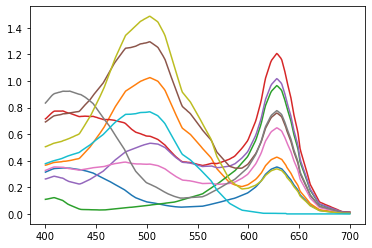

In [7]:
data = pd.read_csv('dye_coeff.csv')
for i in range(10):
    w, a = physics_models.random_spectra(1, data, 400, 700, .3)
    plt.plot(w, a)

In [8]:
spectra_path = '../data/Sample_spectra.xlsx'
sol_path = '../data/Sample_concentrations.xlsx'

In [40]:
spec = pd.read_excel(spectra_path)
spec.columns = [['Wavelength', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']]
spec.head()

,Wavelength,1,2,3,4,5,6,7,8,9,10,11,12,13
0,300,1.249,0.773,0.838,0.980,0.767,0.954,0.854,0.737,0.875,0.869,0.982,0.952,1.012
1,310,1.313,0.584,0.749,0.986,0.654,0.917,0.793,0.591,0.814,0.803,0.977,0.924,1.025
2,320,1.191,0.453,0.576,0.857,0.521,0.809,0.647,0.475,0.686,0.675,0.845,0.803,0.894
3,330,0.762,0.346,0.323,0.525,0.340,0.542,0.386,0.346,0.441,0.435,0.523,0.516,0.549
4,340,0.449,0.353,0.205,0.320,0.281,0.395,0.257,0.331,0.321,0.322,0.328,0.355,0.332


In [10]:
sol = pd.read_excel(sol_path)
sol.head(20)

,Unnamed: 0,Red conc,Green conc,Blue conc,Red vol frac,Green vol frac,Blue vol frac,Red Vol uL,Green Vol uL,Blue Vol uL,Notes,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,A1,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,Stock,NaN,NaN,NaN,NaN,NaN
1,A2,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000,Stock,NaN,NaN,Well Volume,1000.0,uL
2,A3,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,Stock,NaN,NaN,NaN,NaN,NaN
3,A4,1.000000,0.000000,1.000000,0.500000,0.000000,0.500000,500.000000,0.000000,500.000000,Violet,NaN,NaN,NaN,NaN,NaN
4,A5,0.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000,500.000000,500.000000,Indigo,NaN,NaN,NaN,NaN,NaN
5,A6,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000,500.000000,500.000000,0.000000,Yellow,NaN,NaN,NaN,NaN,NaN
6,A7,0.105924,0.076665,0.685257,0.122054,0.088339,0.789607,122.054331,88.338953,789.606716,Random,NaN,NaN,NaN,NaN,NaN
7,A8,0.004387,0.985164,0.144335,0.003869,0.868838,0.127293,3.869413,868.837952,127.292635,Random,NaN,NaN,NaN,NaN,NaN
8,B1,0.585618,0.798564,0.871509,0.259618,0.354022,0.386360,259.617895,354.021939,386.360166,Random,NaN,NaN,NaN,NaN,NaN
9,B2,0.520788,0.930995,0.872063,0.224106,0.400627,0.375267,224.106109,400.626794,375.267097,Random,NaN,NaN,NaN,NaN,NaN


In [11]:
solutions = sol[['Unnamed: 0', 'Red conc', 'Green conc', 'Blue conc']]

In [18]:
coeffs = spec[['Wavelength', 'A1', 'A2', 'A3']]
coeffs.columns = ['Wavelength', 'red', 'green', 'blue']
coeffs.to_csv('rgb_coeff')

In [33]:
solutions.head(13)

,Unnamed: 0,Red conc,Green conc,Blue conc
0,A1,1.000000,0.000000,0.000000
1,A2,0.000000,1.000000,0.000000
2,A3,0.000000,0.000000,1.000000
3,A4,1.000000,0.000000,1.000000
4,A5,0.000000,1.000000,1.000000
5,A6,1.000000,1.000000,0.000000
6,A7,0.105924,0.076665,0.685257
7,A8,0.004387,0.985164,0.144335
8,B1,0.585618,0.798564,0.871509
9,B2,0.520788,0.930995,0.872063


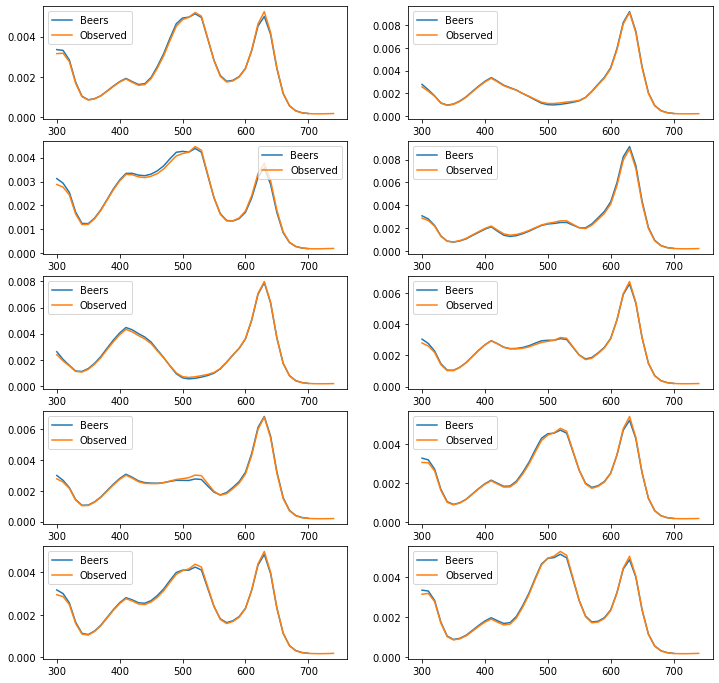

In [63]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,12))
axs = axs.flatten()

for i in range(3, len(solutions)):
    solution = {}
    solution['red'] = solutions.loc[i]['Red conc']
    solution['blue'] = solutions.loc[i]['Blue conc']
    solution['green'] = solutions.loc[i]['Green conc']
    wl, spectra = physics_models.beers_law(solution, 1, coeffs, 300, 700)
    beers_area = sklearn.metrics.auc(wl, spectra)
    obs_area = sklearn.metrics.auc(spec['Wavelength'], spec[str(i+1)])
    axs[i-3].plot(wl, spectra/beers_area, label='Beers')
    axs[i-3].plot(spec['Wavelength'], spec[str(i+1)]/obs_area, label='Observed')
    axs[i-3].legend()
    